In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


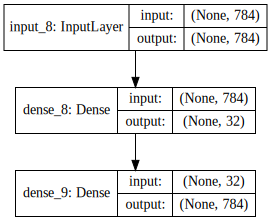

In [8]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim,activation='relu')(input_img)

decoded = Dense(784,activation="sigmoid")(encoded)

autoencoder = Model(input = input_img, output=decoded)


encoder = Model(input=input_img,output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(autoencoder,show_shapes=True).create(prog='dot', format='svg'))

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

15286272/15296311 [============================>.] - ETA: 0s

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
print(x_train[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [12]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s - loss: 0.3731 - val_loss: 0.2729
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 0.2648 - val_loss: 0.2533
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 0.2432 - val_loss: 0.2310
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 0.2235 - val_loss: 0.2139
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 0.2090 - val_loss: 0.2016
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 0.1982 - val_loss: 0.1920
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 0.1894 - val_loss: 0.1840
Epoch 8/50
60000/60000 [==============================] - 0s - loss: 0.1821 - val_loss: 0.1773
Epoch 9/50
60000/60000 [==============================] - 0s - loss: 0.1758 - val_loss: 0.1716
Epoch 10/50
60000/60000 [==============================] - 0s - loss: 0.1704 - val_loss: 0.1664

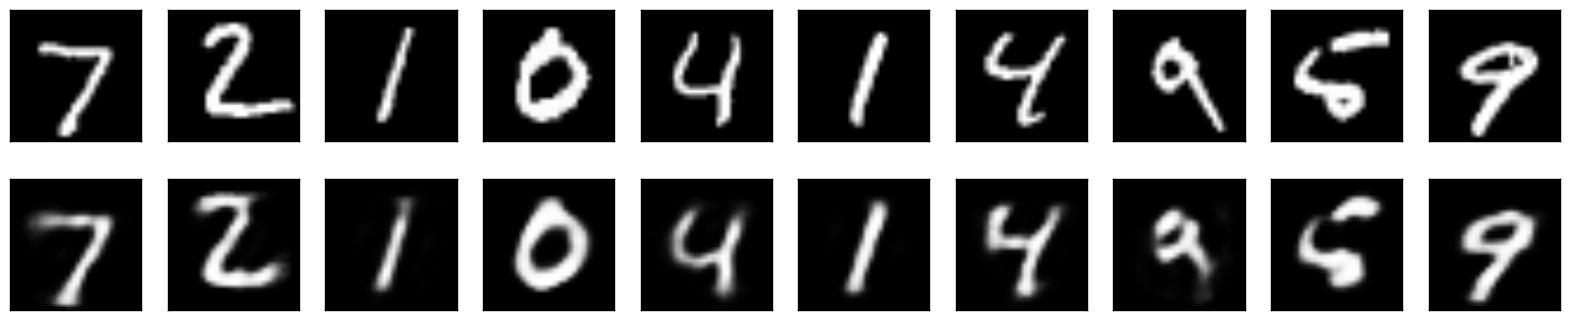

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()